In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

model_directory = '../../job_results_small'
model_directory = '../../../testing/Tukey_Testing/job_results_small'
class_dirs = ['random_forest', 'irv', 'light_chem', 'neural_networks', 'docking']
class_dirs = map(lambda x: '{}/{}/stage_1'.format(model_directory, x), class_dirs)

In [2]:
k = 5

#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 180 results
  r = func(a, **kwargs)
/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 84 results
  r = func(a, **kwargs)


In [3]:
col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 180))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#get tukey results
tukey_dict = tukey_multi_metrics(gather_df, col_indices=col_indices)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
#setup comparison matrix and overlaps
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, tukey_analysis_dict, mean_w=0, median_w=1, tukey_w=100)
overlapping_models = get_overlap(agg_comp_dict, N=1)

/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1730: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:780: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Model Ordering by Metric (Best-to-Worst)

In [4]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC Keck_Pria_AS_Retest,ROC AUC Keck_Pria_FP_data,ROC AUC Keck_RMI_cdd,BEDROC AUC Keck_Pria_AS_Retest,BEDROC AUC Keck_Pria_FP_data,BEDROC AUC Keck_RMI_cdd,PR auc.integral Keck_Pria_AS_Retest,PR auc.integral Keck_Pria_FP_data,PR auc.integral Keck_RMI_cdd,NEF_0.1 % Keck_Pria_AS_Retest,...,n_hits_1000 Keck_RMI_cdd,n_hits_2500 Keck_Pria_AS_Retest,n_hits_2500 Keck_Pria_FP_data,n_hits_2500 Keck_RMI_cdd,n_hits_5000 Keck_Pria_AS_Retest,n_hits_5000 Keck_Pria_FP_data,n_hits_5000 Keck_RMI_cdd,n_hits_10000 Keck_Pria_AS_Retest,n_hits_10000 Keck_Pria_FP_data,n_hits_10000 Keck_RMI_cdd
0,LightChem_a,SingleRegression_b,RandomForest_c,LightChem_b,LightChem_b,RandomForest_c,RandomForest_d,SingleRegression_a,RandomForest_g,RandomForest_d,...,RandomForest_c,LightChem_e,SingleRegression_b,RandomForest_d,LightChem_b,SingleRegression_b,RandomForest_c,IRV_c,SingleRegression_a,SingleRegression_b
1,LightChem_b,SingleRegression_a,RandomForest_d,LightChem_d,LightChem_a,RandomForest_h,RandomForest_c,LightChem_b,RandomForest_f,RandomForest_c,...,RandomForest_d,LightChem_b,LightChem_f,RandomForest_c,LightChem_e,SingleRegression_a,LightChem_c,RandomForest_a,IRV_a,LSTM_a
2,LightChem_d,LightChem_b,RandomForest_h,RandomForest_c,SingleRegression_b,RandomForest_d,RandomForest_b,LightChem_a,RandomForest_e,RandomForest_a,...,RandomForest_e,LightChem_c,LightChem_e,RandomForest_b,LightChem_f,LightChem_f,LightChem_d,IRV_d,IRV_e,IRV_d
3,LightChem_c,LightChem_a,LightChem_e,RandomForest_d,LightChem_f,RandomForest_b,RandomForest_a,RandomForest_d,RandomForest_b,RandomForest_g,...,RandomForest_b,LightChem_d,SingleRegression_a,RandomForest_h,SingleRegression_b,LightChem_a,LightChem_e,IRV_e,IRV_d,IRV_c
4,RandomForest_a,LightChem_d,RandomForest_a,LightChem_c,SingleRegression_a,RandomForest_a,RandomForest_e,RandomForest_c,RandomForest_a,RandomForest_f,...,RandomForest_g,LightChem_a,LightChem_a,RandomForest_a,LightChem_a,LightChem_c,RandomForest_d,IRV_a,IRV_c,IRV_b
5,RandomForest_b,LightChem_f,RandomForest_b,LightChem_e,LightChem_e,RandomForest_e,RandomForest_g,LightChem_c,RandomForest_c,RandomForest_e,...,RandomForest_f,LightChem_f,LightChem_b,LightChem_e,LightChem_c,LightChem_d,RandomForest_h,LightChem_a,IRV_b,IRV_a
6,LightChem_e,LightChem_e,LightChem_d,RandomForest_a,LightChem_c,RandomForest_g,RandomForest_f,RandomForest_a,RandomForest_d,RandomForest_b,...,RandomForest_a,RandomForest_g,LightChem_c,LightChem_c,LightChem_d,LightChem_e,RandomForest_g,LightChem_b,SingleRegression_b,Docing_surflex
7,RandomForest_c,LightChem_c,RandomForest_e,LightChem_a,LightChem_d,RandomForest_f,IRV_d,SingleRegression_b,LightChem_f,LightChem_b,...,RandomForest_h,RandomForest_f,LightChem_d,RandomForest_g,RandomForest_c,RandomForest_c,RandomForest_b,LightChem_d,LightChem_a,Docing_smina
8,LightChem_f,MultiClassification_b,RandomForest_g,RandomForest_b,RandomForest_d,LightChem_d,IRV_b,RandomForest_b,SingleClassification_b,IRV_d,...,LightChem_e,RandomForest_e,RandomForest_b,RandomForest_f,RandomForest_b,RandomForest_b,RandomForest_e,RandomForest_d,Docing_surflex,Docing_rdocktot
9,SingleRegression_b,RandomForest_c,LightChem_c,RandomForest_g,RandomForest_c,LightChem_e,LightChem_b,IRV_e,LightChem_e,IRV_c,...,LightChem_d,RandomForest_d,RandomForest_a,RandomForest_e,RandomForest_a,MultiClassification_b,RandomForest_a,IRV_b,LightChem_c,Docing_rdockint


---
## Metrics Most Similar to N-Hits

In [5]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-18], metric_names[-18:])

,n_hits_100 Keck_Pria_AS_Retest,n_hits_100 Keck_Pria_FP_data,n_hits_100 Keck_RMI_cdd,n_hits_500 Keck_Pria_AS_Retest,n_hits_500 Keck_Pria_FP_data,n_hits_500 Keck_RMI_cdd,n_hits_1000 Keck_Pria_AS_Retest,n_hits_1000 Keck_Pria_FP_data,n_hits_1000 Keck_RMI_cdd,n_hits_2500 Keck_Pria_AS_Retest,n_hits_2500 Keck_Pria_FP_data,n_hits_2500 Keck_RMI_cdd,n_hits_5000 Keck_Pria_AS_Retest,n_hits_5000 Keck_Pria_FP_data,n_hits_5000 Keck_RMI_cdd,n_hits_10000 Keck_Pria_AS_Retest,n_hits_10000 Keck_Pria_FP_data,n_hits_10000 Keck_RMI_cdd
0,NEF_0.5 %,NEF_0.15 %,NEF_1 %,NEF_2 %,"NEF_0.1 %, NEF_0.15 %",NEF_5 %,NEF_10 %,NEF_0.15 %,BEDROC AUC,NEF_10 %,NEF_0.15 %,NEF_20 %,NEF_20 %,"NEF_0.1 %, NEF_0.15 %",NEF_20 %,NEF_0.5 %,"NEF_0.1 %, NEF_0.15 %","ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ..."
1,NEF_1 %,NEF_0.5 %,NEF_0.5 %,NEF_5 %,NEF_2 %,NEF_2 %,NEF AUC,NEF_0.1 %,NEF_10 %,NEF_20 %,NEF_0.1 %,ROC AUC,NEF_10 %,NEF_20 %,ROC AUC,NEF_1 %,NEF_0.5 %,
2,NEF_0.15 %,NEF_1 %,NEF_2 %,BEDROC AUC,NEF AUC,BEDROC AUC,NEF_5 %,NEF_10 %,NEF_5 %,NEF AUC,NEF_10 %,NEF AUC,ROC AUC,NEF_0.5 %,NEF AUC,NEF_0.15 %,NEF_1 %,
3,NEF_0.1 %,NEF_0.1 %,NEF_0.1 %,NEF_10 %,"BEDROC AUC, NEF_5 %, NEF_10 %",NEF_10 %,BEDROC AUC,NEF AUC,NEF AUC,NEF_5 %,NEF_20 %,NEF_10 %,NEF_5 %,NEF_5 %,NEF_10 %,NEF_0.1 %,NEF_2 %,
4,PR auc.integral,"PR auc.integral, NEF_2 %",PR auc.integral,NEF AUC,NEF_1 %,NEF AUC,ROC AUC,BEDROC AUC,NEF_2 %,BEDROC AUC,"NEF_5 %, NEF AUC",BEDROC AUC,NEF AUC,NEF_2 %,BEDROC AUC,NEF_2 %,NEF_5 %,
5,NEF_2 %,BEDROC AUC,NEF_0.15 %,NEF_1 %,NEF_0.5 %,NEF_1 %,NEF_20 %,NEF_5 %,ROC AUC,ROC AUC,NEF_2 %,NEF_5 %,NEF_2 %,NEF_1 %,"NEF_2 %, NEF_5 %",NEF_5 %,NEF_10 %,
6,NEF_5 %,NEF_5 %,NEF_5 %,ROC AUC,ROC AUC,PR auc.integral,NEF_2 %,ROC AUC,NEF_1 %,NEF_2 %,ROC AUC,NEF_2 %,BEDROC AUC,NEF_10 %,NEF_0.1 %,ROC AUC,ROC AUC,
7,BEDROC AUC,NEF_10 %,BEDROC AUC,NEF_0.5 %,PR auc.integral,"NEF_0.1 %, NEF_0.5 %",NEF_1 %,NEF_2 %,NEF_0.1 %,NEF_1 %,NEF_0.5 %,NEF_0.1 %,NEF_1 %,ROC AUC,NEF_0.15 %,NEF_10 %,PR auc.integral,
8,NEF_10 %,NEF AUC,NEF_10 %,NEF_20 %,NEF_20 %,NEF_0.15 %,NEF_0.5 %,NEF_1 %,NEF_20 %,NEF_0.15 %,BEDROC AUC,NEF_1 %,NEF_0.5 %,NEF AUC,NEF_1 %,NEF_20 %,NEF AUC,
9,NEF AUC,ROC AUC,NEF AUC,NEF_0.15 %,,ROC AUC,NEF_0.15 %,NEF_20 %,PR auc.integral,NEF_0.5 %,NEF_1 %,PR auc.integral,NEF_0.15 %,BEDROC AUC,NEF_0.5 %,PR auc.integral,"BEDROC AUC, NEF_20 %",


---
## Overlapping top 1 models over all metrics

In [6]:
overlapping_models

,overlap_perc
RandomForest_c,0.191011
LightChem_b,0.179775
RandomForest_d,0.157303
SingleRegression_b,0.112360
LightChem_e,0.078652
LightChem_a,0.067416
LightChem_d,0.044944
SingleRegression_a,0.044944
IRV_c,0.033708
RandomForest_a,0.022472


In [7]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
RandomForest_c,0.505618
LightChem_b,0.494382
RandomForest_d,0.471910
LightChem_e,0.382022
LightChem_a,0.382022
LightChem_d,0.348315
RandomForest_a,0.314607
RandomForest_b,0.314607
LightChem_c,0.247191
SingleRegression_b,0.202247


---
# Metric Comparison

## Keck_Pria_AS_Retest

In [8]:
model_name = 'Keck_Pria_AS_Retest'

def get_model_ordering(agg_comp_dict, metric_names):
    ordered_df = pd.DataFrame(data=np.zeros((len(agg_comp_dict[metric_names[0]]['top']), len(metric_names))),
                              columns=metric_names,
                              dtype=str)    
    for i, metric in zip(range(len(metric_names)), metric_names):
        ordered_df[metric] = agg_comp_dict[metric]['top'].index.tolist()
        
    return ordered_df

ordered_df = get_model_ordering(agg_comp_dict, metric_names)

In [9]:
print agg_comp_dict.keys()

['n_hits_1000 Mean', 'n_hits_2500 Keck_RMI_cdd', 'n_hits_100 Keck_RMI_cdd', 'PR auc.integral Median', 'NEF_2 % Keck_Pria_AS_Retest', 'n_hits_5000 Keck_Pria_FP_data', 'NEF_0.15 % Keck_Pria_AS_Retest', 'n_hits_500 Median', 'BEDROC AUC Keck_RMI_cdd', 'NEF_5 % Keck_Pria_AS_Retest', 'NEF_0.5 % Median', 'ROC AUC Median', 'n_hits_100 Median', 'n_hits_10000 Keck_Pria_FP_data', 'ROC AUC Keck_RMI_cdd', 'n_hits_1000 Keck_RMI_cdd', 'NEF AUC Mean', 'n_hits_10000 Keck_RMI_cdd', 'NEF AUC Keck_RMI_cdd', 'NEF_1 % Median', 'NEF_0.5 % Keck_RMI_cdd', 'NEF_1 % Keck_Pria_FP_data', 'NEF_1 % Keck_RMI_cdd', 'n_hits_1000 Keck_Pria_FP_data', 'BEDROC AUC Keck_Pria_FP_data', 'NEF_2 % Median', 'n_hits_10000 Keck_Pria_AS_Retest', 'NEF_0.15 % Median', 'n_hits_5000 Keck_Pria_AS_Retest', 'NEF_0.1 % Keck_Pria_AS_Retest', 'n_hits_100 Keck_Pria_FP_data', 'PR auc.integral Keck_Pria_FP_data', 'NEF_10 % Keck_Pria_FP_data', 'NEF_20 % Keck_Pria_FP_data', 'n_hits_500 Keck_Pria_FP_data', 'n_hits_100 Keck_Pria_AS_Retest', 'BEDROC

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

def compare_metrics(agg_comp_dict, metric_0, metric_1):
    rank_0 = agg_comp_dict[metric_0]['top']
    rank_1 = agg_comp_dict[metric_1]['top']
    rank_0 = agg_comp_dict[metric_0]['top']
    rank_1 = agg_comp_dict[metric_1]['top']
    rank_0 = np.array(rank_0[model_names].tolist())
    rank_1 = np.array(rank_1[model_names].tolist())
    # TODO: rank(method='dense')
    rank_0 = rank_0.argsort().argsort()
    rank_1 = rank_1.argsort().argsort()

    plt.scatter(rank_0, rank_1)

    plt.xlim(0, 42)
    plt.ylim(0, 42)
    plt.xlabel('Metric {}'.format(metric_0))
    plt.ylabel('Metric {}'.format(metric_1))
    plt.savefig('plottings/metric_comparison')
    plt.show()
    return

model_names = model_name_dict.values()

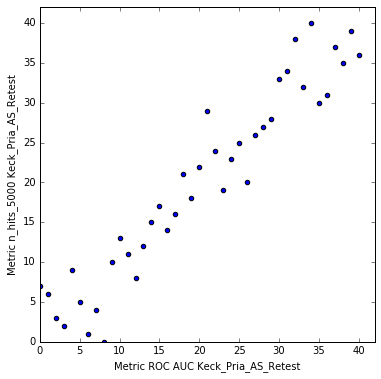

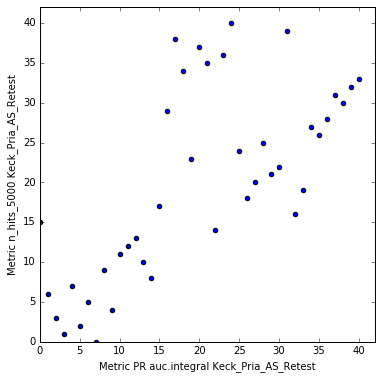

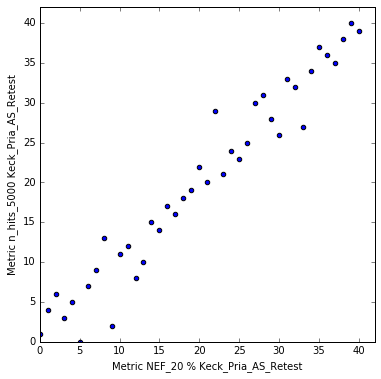

In [11]:
metric_0 = 'ROC AUC Keck_Pria_AS_Retest'
metric_1 = 'n_hits_5000 Keck_Pria_AS_Retest'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'PR auc.integral Keck_Pria_AS_Retest'
metric_1 = 'n_hits_5000 Keck_Pria_AS_Retest'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'NEF_20 % Keck_Pria_AS_Retest'
metric_1 = 'n_hits_5000 Keck_Pria_AS_Retest'
compare_metrics(agg_comp_dict, metric_0, metric_1)

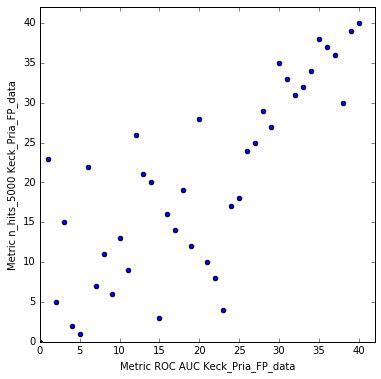

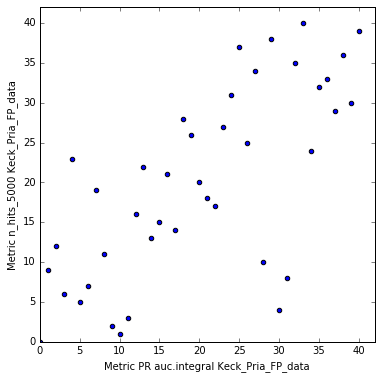

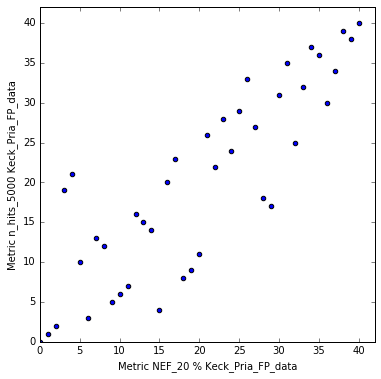

In [12]:
metric_0 = 'ROC AUC Keck_Pria_FP_data'
metric_1 = 'n_hits_5000 Keck_Pria_FP_data'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'PR auc.integral Keck_Pria_FP_data'
metric_1 = 'n_hits_5000 Keck_Pria_FP_data'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'NEF_20 % Keck_Pria_FP_data'
metric_1 = 'n_hits_5000 Keck_Pria_FP_data'
compare_metrics(agg_comp_dict, metric_0, metric_1)

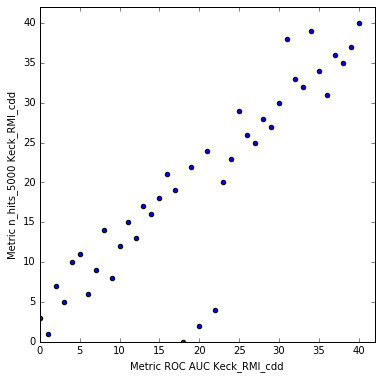

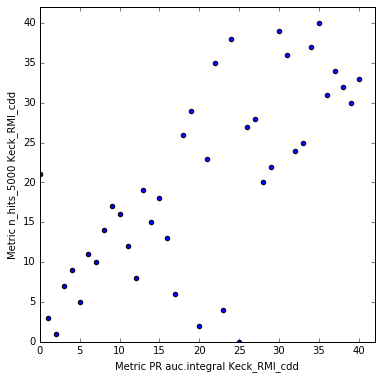

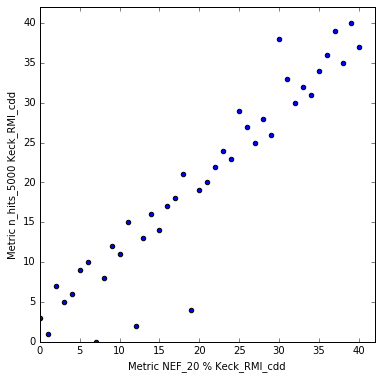

In [13]:
metric_0 = 'ROC AUC Keck_RMI_cdd'
metric_1 = 'n_hits_5000 Keck_RMI_cdd'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'PR auc.integral Keck_RMI_cdd'
metric_1 = 'n_hits_5000 Keck_RMI_cdd'
compare_metrics(agg_comp_dict, metric_0, metric_1)

metric_0 = 'NEF_20 % Keck_RMI_cdd'
metric_1 = 'n_hits_5000 Keck_RMI_cdd'
compare_metrics(agg_comp_dict, metric_0, metric_1)